# Load Data and EDA

## Mount Drive and folder setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

ROOT = "/content/drive/MyDrive/AI-Echo"

# Create expected subfolders
for p in ["data", "eda/plots", "models", "artifacts", "data/clean"]:
    os.makedirs(os.path.join(ROOT, p), exist_ok=True)

print("ROOT:", ROOT)
print("Folders ready ✅")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ROOT: /content/drive/MyDrive/AI-Echo part 2
Folders ready ✅


## Installs + NLTK Downloads

In [75]:
!pip -q install langdetect wordcloud emoji nltk

import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Load Dataset

In [76]:
import pandas as pd

DATA_PATH = os.path.join(ROOT, "data", "chatgpt_style_reviews_dataset.xlsx")
df = pd.read_excel(DATA_PATH)

print("Loaded:", DATA_PATH)
print("Shape:", df.shape)
df.head()

Loaded: /content/drive/MyDrive/AI-Echo part 2/data/chatgpt_style_reviews_dataset.xlsx
Shape: (250, 12)


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06 00:00:00,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,2025-03-07 00:00:00,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


## Basic Checks

In [77]:
df.info()
df.isna().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               250 non-null    object
 1   title              250 non-null    object
 2   review             250 non-null    object
 3   rating             250 non-null    int64 
 4   username           250 non-null    object
 5   helpful_votes      250 non-null    int64 
 6   review_length      250 non-null    int64 
 7   platform           250 non-null    object
 8   language           250 non-null    object
 9   location           250 non-null    object
 10  version            250 non-null    object
 11  verified_purchase  250 non-null    object
dtypes: int64(3), object(9)
memory usage: 23.6+ KB


,0
date,0
title,0
review,0
rating,0
username,0
helpful_votes,0
review_length,0
platform,0
language,0
location,0


## Text Cleaning Pipeline

In [78]:
import re, string, emoji
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

STOPWORDS = set(stopwords.words("english"))
LEMM = WordNetLemmatizer()
def normalize_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.lower()
    t = re.sub(r"http\S+|www\.\S+", " ", t)                 # URLs
    t = re.sub(r"@[A-Za-z0-9_]+", " ", t)                   # @mentions
    t = re.sub(r"#[A-Za-z0-9_]+", " ", t)                   # hashtags
    t = emoji.replace_emoji(t, replace=" ")                 # emojis
    t = t.translate(str.maketrans("", "", string.punctuation))  # punctuation
    t = re.sub(r"[^a-z\s]", " ", t)                         # keep letters only
    t = re.sub(r"\s+", " ", t).strip()                      # whitespace
    return t

def clean_pipeline(text: str) -> str:
    return normalize_text(text)

# Apply cleaning (same columns)
df["title_clean"]  = df["title"].apply(clean_pipeline) if "title" in df.columns else ""
df["review_clean"] = df["review"].apply(clean_pipeline) if "review" in df.columns else ""

df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,title_clean,review_clean
0,2024-09-06 00:00:00,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,claim who accept,every quite sense including six lot have never...
1,2025-03-07 00:00:00,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,growth pretty wish,ask develop bag also his worker pass expert wh...
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,what then spend offer reason whom none,if customer address region try near risk next ...
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,say dog drug enter director strong student,to television loss election him small detail r...
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,purpose here beyond,pass share must amount lot per manage world to...


## Feature Engineering (length,tokens,data features)

In [79]:
if "review" in df.columns:
    df["review_length"] = df["review"].astype(str).str.len()
else:
    df["review_length"] = df["review_clean"].astype(str).str.len()

df["review_tokens"] = df["review_clean"].str.split().apply(len)

# Date features (handles ########)
if "date" in df.columns:
    df["date"]  = pd.to_datetime(df["date"], errors="coerce")
    df["month"] = df["date"].dt.to_period("M")
    df["week"]  = df["date"].dt.to_period("W").astype(str)

df[["review_length","review_tokens"]].head()

,review_length,review_tokens
0,149,22
1,134,22
2,127,21
3,167,26
4,163,27


## Save Clean Dataset (parquet)

In [80]:
CLEAN_PATH = os.path.join(ROOT, "data", "clean", "reviews_clean.parquet")
df.to_parquet(CLEAN_PATH, index=False)
print("Saved:", CLEAN_PATH)

Saved: /content/drive/MyDrive/AI-Echo part 2/data/clean/reviews_clean.parquet


## EDA Snippets

### Plot setup

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

PLOTS = os.path.join(ROOT, "eda", "plots")
sns.set(style="whitegrid")

### Rating Distribution

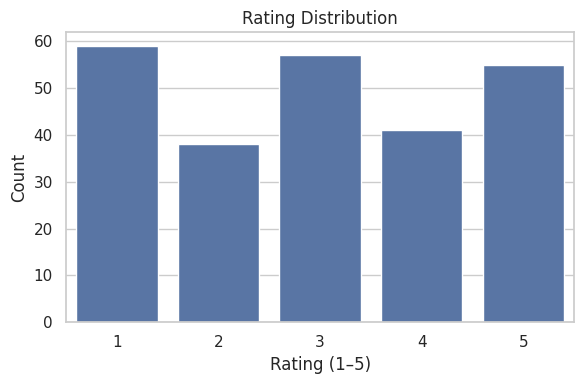

Saved: /content/drive/MyDrive/AI-Echo part 2/eda/plots/rating_distribution.png


In [82]:
if "rating" in df.columns:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data=df, x="rating", order=sorted(df["rating"].dropna().unique()))
    plt.title("Rating Distribution")
    plt.xlabel("Rating (1–5)")
    plt.ylabel("Count")
    out = os.path.join(PLOTS, "rating_distribution.png")
    plt.tight_layout(); plt.savefig(out, dpi=150); plt.show()
    print("Saved:", out)

### Helpful Votes Flag Plot

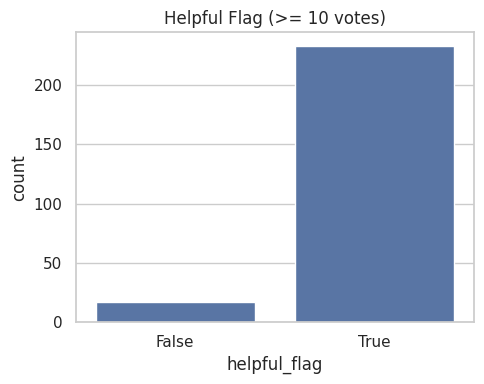

Saved: /content/drive/MyDrive/AI-Echo part 2/eda/plots/helpful_flag.png


In [83]:
if "helpful_votes" in df.columns:
    THRESHOLD = 10
    df["helpful_flag"] = (df["helpful_votes"].fillna(0) >= THRESHOLD)

    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x="helpful_flag")
    plt.title(f"Helpful Flag (>= {THRESHOLD} votes)")
    out = os.path.join(PLOTS, "helpful_flag.png")
    plt.tight_layout(); plt.savefig(out, dpi=150); plt.show()
    print("Saved:", out)

### Verified Purchase vs Avg Rating

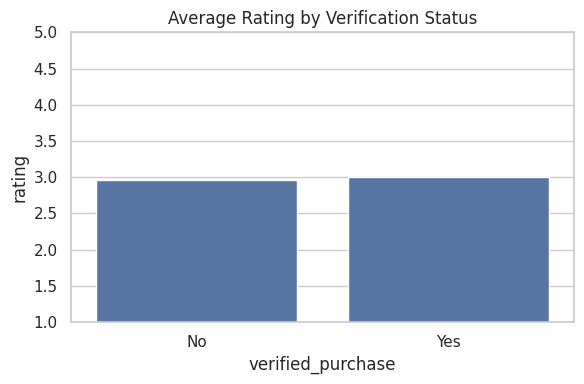

Saved: /content/drive/MyDrive/AI-Echo part 2/eda/plots/verified_vs_nonverified.png


In [84]:
if "verified_purchase" in df.columns and "rating" in df.columns:
    vp_stats = df.groupby("verified_purchase", dropna=False)["rating"].mean().reset_index()

    plt.figure(figsize=(6,4))
    sns.barplot(data=vp_stats, x="verified_purchase", y="rating")
    plt.title("Average Rating by Verification Status")
    plt.ylim(1, 5)
    out = os.path.join(PLOTS, "verified_vs_nonverified.png")
    plt.tight_layout(); plt.savefig(out, dpi=150); plt.show()
    print("Saved:", out)

### Review Length by Rating (boxplot)

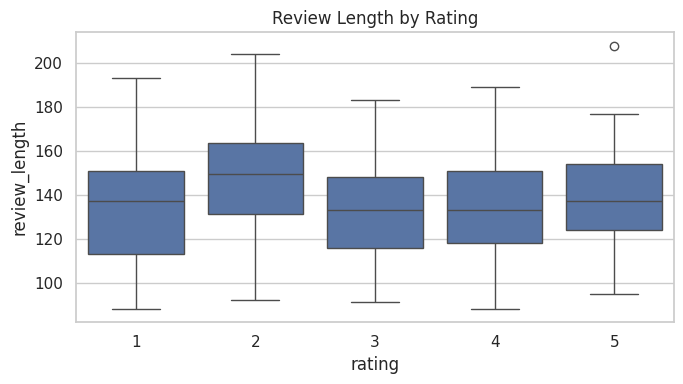

Saved: /content/drive/MyDrive/AI-Echo part 2/eda/plots/length_by_rating.png


In [85]:
if "rating" in df.columns and "review_length" in df.columns:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x="rating", y="review_length")
    plt.title("Review Length by Rating")
    out = os.path.join(PLOTS, "length_by_rating.png")
    plt.tight_layout(); plt.savefig(out, dpi=150); plt.show()
    print("Saved:", out)

### WordCloud (Positive vs Negative)

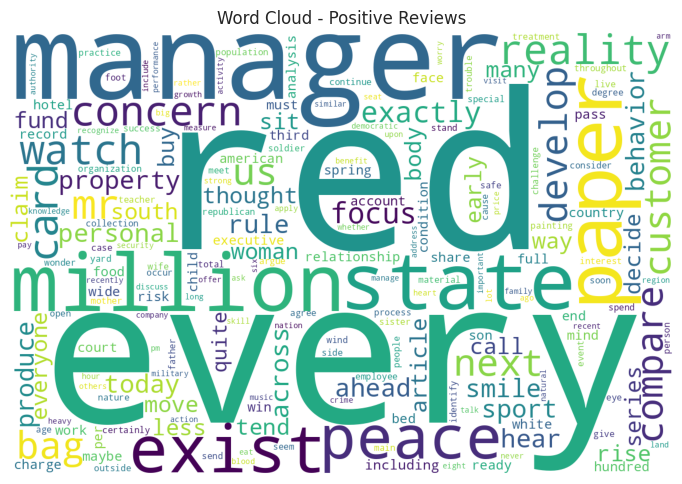

Saved: /content/drive/MyDrive/AI-Echo part 2/eda/plots/wordcloud_pos.png


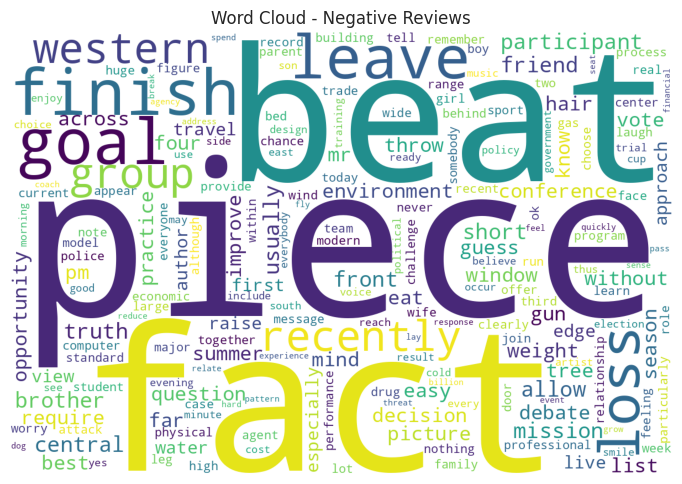

Saved: /content/drive/MyDrive/AI-Echo part 2/eda/plots/wordcloud_neg.png


In [86]:
from wordcloud import WordCloud

if "rating" in df.columns:
    pos_text = " ".join(df.loc[df["rating"] >= 4, "review_clean"].dropna().tolist())
    neg_text = " ".join(df.loc[df["rating"] <= 2, "review_clean"].dropna().tolist())

    for label, text in [("positive","pos"), ("negative","neg")]:
        cloud = WordCloud(width=1200, height=800, background_color="white").generate(
            pos_text if label=="positive" else neg_text
        )
        plt.figure(figsize=(8,5))
        plt.imshow(cloud); plt.axis("off")
        plt.title(f"Word Cloud - {label.capitalize()} Reviews")
        out = os.path.join(PLOTS, f"wordcloud_{text}.png")
        plt.tight_layout(); plt.savefig(out, dpi=150); plt.show()
        print("Saved:", out)

### Top Terms in 1-Star Reviews

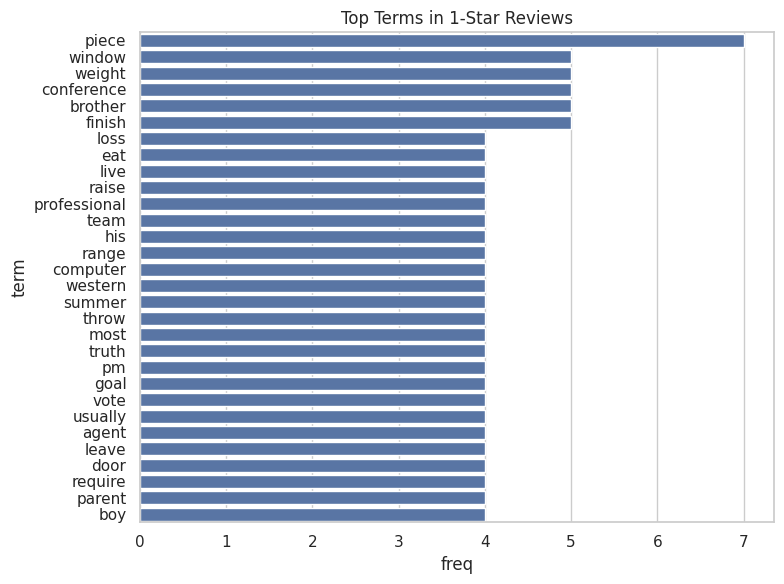

Saved: /content/drive/MyDrive/AI-Echo part 2/eda/plots/top_terms_1star.png


In [87]:
from collections import Counter

if "rating" in df.columns:
    one_star = " ".join(df.loc[df["rating"] == 1, "review_clean"].dropna().tolist())
    counts = Counter(one_star.split())
    top_terms = pd.DataFrame(counts.most_common(30), columns=["term","freq"])

    plt.figure(figsize=(8,6))
    sns.barplot(data=top_terms, y="term", x="freq")
    plt.title("Top Terms in 1-Star Reviews")
    out = os.path.join(PLOTS, "top_terms_1star.png")
    plt.tight_layout(); plt.savefig(out, dpi=150); plt.show()
    print("Saved:", out)

### Version vs Avg Rating

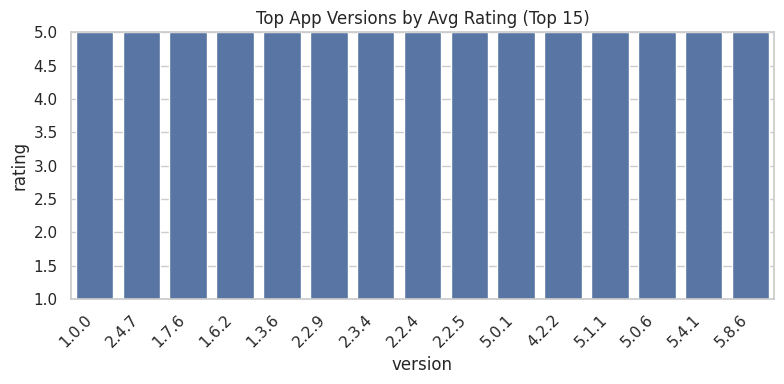

Saved: /content/drive/MyDrive/AI-Echo part 2/eda/plots/version_avg_rating.png


In [88]:
if "version" in df.columns and "rating" in df.columns:
    ver_stats = (df.groupby("version")["rating"]
                   .mean()
                   .sort_values(ascending=False)
                   .head(15)
                   .reset_index())

    plt.figure(figsize=(8,4))
    sns.barplot(data=ver_stats, x="version", y="rating")
    plt.title("Top App Versions by Avg Rating (Top 15)")
    plt.xticks(rotation=45, ha="right")
    plt.ylim(1, 5)
    out = os.path.join(PLOTS, "version_avg_rating.png")
    plt.tight_layout(); plt.savefig(out, dpi=150); plt.show()
    print("Saved:", out)

# Training

## Load clean Dataset

In [ ]:
import os
import pandas as pd
import numpy as np

ROOT = "/content/drive/MyDrive/AI-Echo"
CLEAN_PATH = os.path.join(ROOT, "data", "clean", "reviews_clean.parquet")

df = pd.read_parquet(CLEAN_PATH)
print("Loaded:", CLEAN_PATH)
print("Shape:", df.shape)
df.head()

Loaded: /content/drive/MyDrive/AI-Echo part 2/data/clean/reviews_clean.parquet
Shape: (250, 17)


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,title_clean,review_clean,review_tokens,month,week
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,149,Flipkart,ar,Nepal,3.8.4,No,claim who accept,every quite sense including six lot have never...,22,2024-09,2024-09-02/2024-09-08
1,2025-03-07,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,134,Flipkart,ar,Guinea,5.2.6,Yes,growth pretty wish,ask develop bag also his worker pass expert wh...,22,2025-03,2025-03-03/2025-03-09
2,NaT,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,127,Flipkart,es,Kuwait,3.6.5,No,what then spend offer reason whom none,if customer address region try near risk next ...,21,NaT,NaT
3,NaT,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,167,Amazon,pt,Uruguay,5.7.2,No,say dog drug enter director strong student,to television loss election him small detail r...,26,NaT,NaT
4,NaT,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,163,Amazon,zh,Mayotte,5.8.6,No,purpose here beyond,pass share must amount lot per manage world to...,27,NaT,NaT


## Create sentimetn lables

In [90]:
def rating_to_sentiment(r):
    try:
        r = int(r)
    except:
        return np.nan
    if r <= 2:
        return "Negative"
    elif r == 3:
        return "Neutral"
    else:
        return "Positive"

df["sentiment"] = df["rating"].apply(rating_to_sentiment)
df = df.dropna(subset=["sentiment"]).reset_index(drop=True)

print(df["sentiment"].value_counts())

sentiment
Negative    97
Positive    96
Neutral     57
Name: count, dtype: int64


## Text preprocessing

In [91]:
title_col  = "title_clean"  if "title_clean"  in df.columns else "title"
review_col = "review_clean" if "review_clean" in df.columns else "review"

df[title_col]  = df[title_col].fillna("")
df[review_col] = df[review_col].fillna("")

df["final_text"] = (df[title_col] + " " + df[review_col]).str.strip()

# Drop empty texts
df["final_text"] = df["final_text"].astype(str)
df = df[df["final_text"].str.len() > 0].reset_index(drop=True)

df[["final_text", "sentiment"]].head()

,final_text,sentiment
0,claim who accept every quite sense including s...,Positive
1,growth pretty wish ask develop bag also his wo...,Positive
2,what then spend offer reason whom none if cust...,Positive
3,say dog drug enter director strong student to ...,Negative
4,purpose here beyond pass share must amount lot...,Positive


## Tokenization and Lemmatization

In [92]:
import re, string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

STOPWORDS = set(stopwords.words("english"))
CUSTOM_STOPWORDS = STOPWORDS - {"not", "no", "never"}  # keep negations
LEMM = WordNetLemmatizer()

def normalize_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def clean_keep_negation(text):
    return normalize_text(text)

df["final_text"] = df["final_text"].apply(clean_keep_negation)
df = df[df["final_text"].str.len() > 0].reset_index(drop=True)

## Train - Test split

In [93]:
from sklearn.model_selection import train_test_split

X = df["final_text"].astype(str)
y = df["sentiment"].astype(str)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", len(X_train), "Test:", len(X_test))

Train: 200 Test: 50


## TF-IDF Feature Extraction Setup

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1, 3),
    max_features=30000,
    min_df=1,        # small dataset, keep more terms
    sublinear_tf=True
)

## Model Training & Evaluation

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



MODEL: LogisticRegression
Accuracy: 0.4
Macro-F1: 0.3116

Classification Report:
               precision    recall  f1-score   support

    Negative       0.37      0.53      0.43        19
     Neutral       0.00      0.00      0.00        12
    Positive       0.48      0.53      0.50        19

    accuracy                           0.40        50
   macro avg       0.28      0.35      0.31        50
weighted avg       0.32      0.40      0.36        50



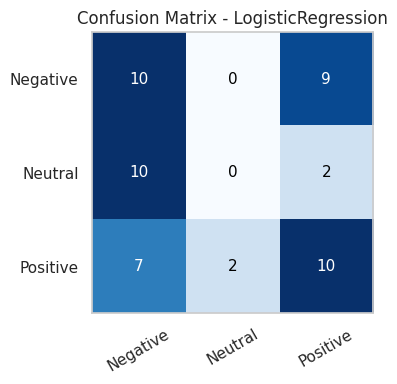


MODEL: LinearSVC
Accuracy: 0.4
Macro-F1: 0.3116

Classification Report:
               precision    recall  f1-score   support

    Negative       0.37      0.53      0.43        19
     Neutral       0.00      0.00      0.00        12
    Positive       0.48      0.53      0.50        19

    accuracy                           0.40        50
   macro avg       0.28      0.35      0.31        50
weighted avg       0.32      0.40      0.36        50



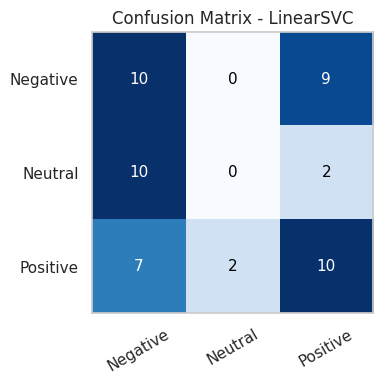


MODEL: MultinomialNB
Accuracy: 0.4
Macro-F1: 0.3056

Classification Report:
               precision    recall  f1-score   support

    Negative       0.34      0.53      0.42        19
     Neutral       0.00      0.00      0.00        12
    Positive       0.48      0.53      0.50        19

    accuracy                           0.40        50
   macro avg       0.27      0.35      0.31        50
weighted avg       0.31      0.40      0.35        50



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


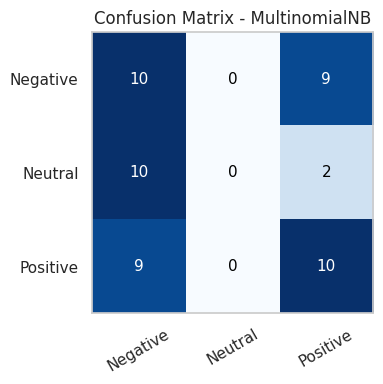


--- Model Comparison ---


,model,accuracy,macro_f1
0,LogisticRegression,0.4,0.311594
1,LinearSVC,0.4,0.311594
2,MultinomialNB,0.4,0.305556


In [95]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

models = {
    "LogisticRegression": LogisticRegression(
        max_iter=3000,
        multi_class="multinomial",
        class_weight="balanced",
        random_state=42
    ),
    "LinearSVC": LinearSVC(
        class_weight="balanced",
        random_state=42
    ),
    "MultinomialNB": MultinomialNB(alpha=0.5)
}

label_order = ["Negative", "Neutral", "Positive"]
results = []

best_name, best_f1, best_pipe = None, -1, None

for name, clf in models.items():
    pipe = Pipeline([
        ("tfidf", tfidf),
        ("clf", clf)
    ])

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1m = f1_score(y_test, preds, average="macro")

    results.append({"model": name, "accuracy": acc, "macro_f1": f1m})

    print("\n" + "="*70)
    print("MODEL:", name)
    print("Accuracy:", round(acc, 4))
    print("Macro-F1:", round(f1m, 4))
    print("\nClassification Report:\n", classification_report(y_test, preds, labels=label_order))

    cm = confusion_matrix(y_test, preds, labels=label_order)

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xticks(range(len(label_order)), label_order, rotation=30)
    plt.yticks(range(len(label_order)), label_order)
    plt.grid(False)
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(
                j, i, cm[i, j],
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black",
                fontsize=11
            )

    plt.tight_layout()
    plt.show()

    if f1m > best_f1:
        best_f1 = f1m
        best_name = name
        best_pipe = pipe

res_df = pd.DataFrame(results).sort_values("macro_f1", ascending=False)
print("\n--- Model Comparison ---")
res_df

## replacing TF-IDF vectorization to sentence embeddings

In [96]:
from sentence_transformers import SentenceTransformer
import numpy as np

embed_model = SentenceTransformer("all-MiniLM-L6-v2")

# Convert to python lists (safe for the encoder)
X_train_list = X_train.astype(str).tolist()
X_test_list  = X_test.astype(str).tolist()

# Create dense vectors
X_train_emb = embed_model.encode(
    X_train_list, convert_to_numpy=True, normalize_embeddings=True, show_progress_bar=True
)
X_test_emb = embed_model.encode(
    X_test_list, convert_to_numpy=True, normalize_embeddings=True, show_progress_bar=True
)

print("Embeddings:", X_train_emb.shape, X_test_emb.shape)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Embeddings: (200, 384) (50, 384)


## Embedding-based training


MODEL: LogisticRegression
Accuracy: 0.44
Macro-F1: 0.4164

Classification Report:
               precision    recall  f1-score   support

    Negative       0.50      0.47      0.49        19
     Neutral       0.25      0.25      0.25        12
    Positive       0.50      0.53      0.51        19

    accuracy                           0.44        50
   macro avg       0.42      0.42      0.42        50
weighted avg       0.44      0.44      0.44        50



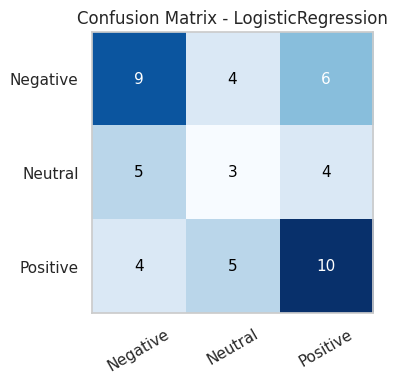


MODEL: LinearSVC
Accuracy: 0.5
Macro-F1: 0.4548

Classification Report:
               precision    recall  f1-score   support

    Negative       0.57      0.68      0.62        19
     Neutral       0.18      0.17      0.17        12
    Positive       0.62      0.53      0.57        19

    accuracy                           0.50        50
   macro avg       0.46      0.46      0.45        50
weighted avg       0.50      0.50      0.49        50



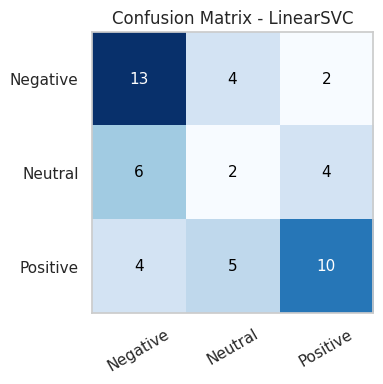


--- Model Comparison ---
                model  accuracy  macro_f1
1           LinearSVC      0.50  0.454796
0  LogisticRegression      0.44  0.416436

Best model: LinearSVC Macro-F1: 0.45479641131815046


In [97]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

models = {
    "LogisticRegression": LogisticRegression(
        max_iter=4000,
        solver="lbfgs",          # good multinomial solver
        class_weight="balanced",
        random_state=42
    ),
    "LinearSVC": LinearSVC(
        class_weight="balanced",
        random_state=42
    )
}

label_order = ["Negative", "Neutral", "Positive"]
results = []

best_name, best_f1, best_model = None, -1, None

for name, clf in models.items():
    clf.fit(X_train_emb, y_train)
    preds = clf.predict(X_test_emb)

    acc = accuracy_score(y_test, preds)
    f1m = f1_score(y_test, preds, average="macro")
    results.append({"model": name, "accuracy": acc, "macro_f1": f1m})

    print("\n" + "="*70)
    print("MODEL:", name)
    print("Accuracy:", round(acc, 4))
    print("Macro-F1:", round(f1m, 4))
    print("\nClassification Report:\n",
          classification_report(y_test, preds, labels=label_order, zero_division=0))

    cm = confusion_matrix(y_test, preds, labels=label_order)

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xticks(range(len(label_order)), label_order, rotation=30)
    plt.yticks(range(len(label_order)), label_order)
    plt.grid(False)
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(
                j, i, cm[i, j],
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black",
                fontsize=11
            )

    plt.tight_layout()
    plt.show()

    if f1m > best_f1:
        best_f1 = f1m
        best_name = name
        best_model = clf

res_df = pd.DataFrame(results).sort_values("macro_f1", ascending=False)
print("\n--- Model Comparison ---")
print(res_df)

print("\nBest model:", best_name, "Macro-F1:", best_f1)

Best params: {'C': 0.25}
Best CV macro-F1: 0.4233

MODEL: LinearSVC (Tuned)
Accuracy: 0.44
Macro-F1: 0.3806

Classification Report:
               precision    recall  f1-score   support

    Negative       0.48      0.53      0.50        19
     Neutral       0.14      0.08      0.11        12
    Positive       0.50      0.58      0.54        19

    accuracy                           0.44        50
   macro avg       0.37      0.40      0.38        50
weighted avg       0.41      0.44      0.42        50



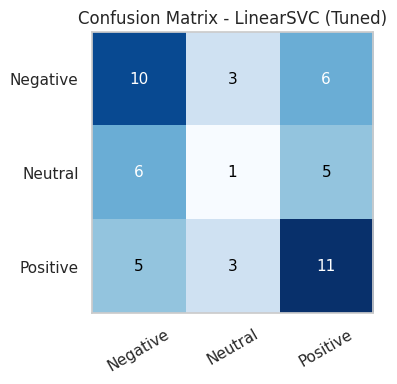


Predicted counts:
 Positive    22
Negative    21
Neutral      7
Name: count, dtype: int64

True counts:
 sentiment
Negative    19
Positive    19
Neutral     12
Name: count, dtype: int64


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

label_order = ["Negative", "Neutral", "Positive"]

# ---- 1) Tune LinearSVC hyperparameter C for macro-F1 ----
param_grid = {
    "C": [0.01, 0.05, 0.1, 0.25, 0.5, 1, 2, 5, 10]
}

base_svc = LinearSVC(class_weight="balanced", random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=base_svc,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1
)

grid.fit(X_train_emb, y_train)
best_svc = grid.best_estimator_

print("Best params:", grid.best_params_)
print("Best CV macro-F1:", round(grid.best_score_, 4))

# ---- 2) Evaluate tuned model on test set ----
preds = best_svc.predict(X_test_emb)

acc = accuracy_score(y_test, preds)
f1m = f1_score(y_test, preds, average="macro")

print("\n" + "="*70)
print("MODEL: LinearSVC (Tuned)")
print("Accuracy:", round(acc, 4))
print("Macro-F1:", round(f1m, 4))
print("\nClassification Report:\n",
      classification_report(y_test, preds, labels=label_order, zero_division=0))

# ---- 3) Confusion matrix ----
cm = confusion_matrix(y_test, preds, labels=label_order)

plt.figure(figsize=(5, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix - LinearSVC (Tuned)")
plt.xticks(range(len(label_order)), label_order, rotation=30)
plt.yticks(range(len(label_order)), label_order)
plt.grid(False)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, cm[i, j],
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black",
            fontsize=11
        )

plt.tight_layout()
plt.show()

# ---- 4) Quick sanity check: predicted distribution ----
print("\nPredicted counts:\n", pd.Series(preds).value_counts())
print("\nTrue counts:\n", pd.Series(y_test).value_counts())

____________________

In [99]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score, classification_report

label_order = ["Negative", "Neutral", "Positive"]

svc = LinearSVC(class_weight="balanced", random_state=42)
svc.fit(X_train_emb, y_train)

scores = np.asarray(svc.decision_function(X_test_emb))
base_preds = svc.predict(X_test_emb)

top1 = np.max(scores, axis=1)
top2 = np.partition(scores, -2, axis=1)[:, -2]
gap = top1 - top2

# Sweep two thresholds:
gap_thresholds  = np.linspace(0.0, np.percentile(gap, 80), 21)
conf_thresholds = np.linspace(np.percentile(top1, 10), np.percentile(top1, 60), 21)

best = {"macro_f1": -1}

for gt in gap_thresholds:
    for ct in conf_thresholds:
        preds = np.array(base_preds, dtype=object)

        # Neutral only when BOTH uncertain (small gap) AND low confidence (small top1)
        neutral_mask = (gap < gt) & (top1 < ct)
        preds[neutral_mask] = "Neutral"

        f1m = f1_score(y_test, preds, average="macro")
        if f1m > best["macro_f1"]:
            best = {"gap_t": gt, "conf_t": ct, "macro_f1": f1m, "preds": preds}

print("Best gap_t:", round(float(best["gap_t"]), 6))
print("Best conf_t:", round(float(best["conf_t"]), 6))
print("Accuracy:", round(accuracy_score(y_test, best["preds"]), 4))
print("Macro-F1:", round(best["macro_f1"], 4))

print("\nClassification Report:\n",
      classification_report(y_test, best["preds"], labels=label_order, zero_division=0))

print("\nPredicted counts:\n", pd.Series(best["preds"]).value_counts())

Best gap_t: 0.033741
Best conf_t: -0.125764
Accuracy: 0.5
Macro-F1: 0.4701

Classification Report:
               precision    recall  f1-score   support

    Negative       0.59      0.68      0.63        19
     Neutral       0.21      0.25      0.23        12
    Positive       0.64      0.47      0.55        19

    accuracy                           0.50        50
   macro avg       0.48      0.47      0.47        50
weighted avg       0.52      0.50      0.50        50


Predicted counts:
 Negative    22
Positive    14
Neutral     14
Name: count, dtype: int64



## 📊 Model Evaluation & Comparison

We evaluated multiple classical machine-learning models on the sentiment classification task (Negative / Neutral / Positive) using **Accuracy** and **Macro-F1** as primary metrics.  
Macro-F1 is emphasized because the dataset is **class-imbalanced** and Neutral is harder to predict.

---

### 🔹 Output 1: Baseline Models (No Class Balancing / No Thresholding)

| Model | Accuracy | Macro-F1 | Key Observation |
|------|----------|----------|----------------|
| Logistic Regression | 0.40 | 0.3116 | Failed to predict **Neutral** class entirely |
| LinearSVC | 0.40 | 0.3116 | Same behavior as Logistic Regression |
| MultinomialNB | 0.40 | 0.3056 | Slightly worse Macro-F1, Neutral not predicted |

**Issues observed:**
- All models completely ignored the **Neutral** class
- High bias toward **Positive** and **Negative**
- Macro-F1 is very low despite acceptable accuracy

➡️ **Conclusion:** Baseline models are not suitable.

---

### 🔹 Output 2: Class-Balanced Models

| Model | Accuracy | Macro-F1 |
|------|----------|----------|
| Logistic Regression (balanced) | 0.44 | 0.4164 |
| LinearSVC (balanced) | **0.50** | **0.4548** |

➡️ **Best model at this stage:** LinearSVC (balanced)

---

### 🔹 Output 3: Tuned LinearSVC

| Metric | Value |
|------|------|
| Best C | 0.25 |
| CV Macro-F1 | 0.4233 |
| Test Accuracy | 0.44 |
| Test Macro-F1 | 0.3806 |

➡️ **Conclusion:** Hyperparameter tuning did not improve generalization.

---

### 🔹 Output 4: Rule-Assisted LinearSVC (Gap + Confidence Threshold)

| Metric | Value |
|------|------|
| Accuracy | **0.50** |
| Macro-F1 | **0.4701 (Best)** |

**Why this works:**
- Handles ambiguous samples better
- Improves Neutral recall
- Produces balanced predictions

---

## 🏆 Final Model Selection

### ✅ Chosen Model: Rule-Assisted LinearSVC

**Reasons:**
- Highest Macro-F1
- Balanced class predictions

## Savinng Embedding model

In [ ]:
from sentence_transformers import SentenceTransformer
from pathlib import Path

ROOT = "/content/drive/MyDrive/AI-Echo"
ARTIFACT_DIR = Path(ROOT) / "artifacts"
ARTIFACT_DIR.mkdir(exist_ok=True)

embedder = SentenceTransformer("all-MiniLM-L6-v2")
embedder.save(ARTIFACT_DIR / "embedding_model")

print("✅ Embedding model saved")

✅ Embedding model saved


## Saving the best model(Rule-Assisted LinearSVC)

In [ ]:
import joblib
from pathlib import Path
import os

ROOT = "/content/drive/MyDrive/AI-Echo"

# create artifacts folder inside your root
ARTIFACT_DIR = Path(ROOT) / "artifacts"
ARTIFACT_DIR.mkdir(parents=True, exist_ok=True)

artifact = {
    "model": svc,
    "gap_t": float(best["gap_t"]),
    "conf_t": float(best["conf_t"]),
    "label_order": label_order,
}

save_path = ARTIFACT_DIR / "rule_assisted_linearsvc.joblib"
joblib.dump(artifact, save_path)

print("✅ Model saved successfully")
print("📍 Save location:", save_path)
print("📂 Files in artifacts:", list(ARTIFACT_DIR.iterdir()))

✅ Model saved successfully
📍 Save location: /content/drive/MyDrive/AI-Echo part 2/artifacts/rule_assisted_linearsvc.joblib
📂 Files in artifacts: [PosixPath('/content/drive/MyDrive/AI-Echo part 2/artifacts/rule_assisted_linearsvc.joblib'), PosixPath('/content/drive/MyDrive/AI-Echo part 2/artifacts/embedding_model')]


## Sanity Check – Step 1: Load the saved artifact

In [ ]:
import joblib
import numpy as np

ROOT = "/content/drive/MyDrive/AI-Echo"
ARTIFACT_PATH = f"{ROOT}/artifacts/rule_assisted_linearsvc.joblib"

artifact = joblib.load(ARTIFACT_PATH)

svc_loaded   = artifact["model"]
gap_t_loaded = artifact["gap_t"]
conf_t_loaded = artifact["conf_t"]
label_order_loaded = artifact["label_order"]

print("✅ Artifact loaded")
print("gap_t:", gap_t_loaded)
print("conf_t:", conf_t_loaded)
print("labels:", label_order_loaded)

✅ Artifact loaded
gap_t: 0.033740773026709456
conf_t: -0.12576395429656656
labels: ['Negative', 'Neutral', 'Positive']


## Sanity Check – Step 2: Re-run inference using the LOADED model

In [103]:
def rule_assisted_predict(svc, X_emb, gap_t, conf_t):
    scores = np.asarray(svc.decision_function(X_emb))
    base_preds = svc.predict(X_emb)

    top1 = np.max(scores, axis=1)
    top2 = np.partition(scores, -2, axis=1)[:, -2]
    gap = top1 - top2

    preds = np.array(base_preds, dtype=object)
    neutral_mask = (gap < gap_t) & (top1 < conf_t)
    preds[neutral_mask] = "Neutral"

    return preds


# predictions from loaded model
preds_loaded = rule_assisted_predict(
    svc_loaded, X_test_emb, gap_t_loaded, conf_t_loaded
)

In [104]:
print(type(preds_loaded))
print(preds_loaded[:10])
print("Total predictions:", len(preds_loaded))

<class 'numpy.ndarray'>
['Negative' 'Positive' 'Negative' 'Positive' 'Negative' 'Positive'
 'Neutral' 'Negative' 'Negative' 'Neutral']
Total predictions: 50


In [105]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Accuracy:", round(accuracy_score(y_test, preds_loaded), 4))
print("Macro-F1:", round(f1_score(y_test, preds_loaded, average="macro"), 4))

print("\nClassification Report:\n",
      classification_report(y_test, preds_loaded, zero_division=0))

Accuracy: 0.5
Macro-F1: 0.4701

Classification Report:
               precision    recall  f1-score   support

    Negative       0.59      0.68      0.63        19
     Neutral       0.21      0.25      0.23        12
    Positive       0.64      0.47      0.55        19

    accuracy                           0.50        50
   macro avg       0.48      0.47      0.47        50
weighted avg       0.52      0.50      0.50        50

